In [1]:
import numpy as np
import pandas as pd

from nltk.corpus import names
import nltk; nltk.download('stopwords')
# NLTK Stop words
from nltk.corpus import stopwords
russian_stopwords = stopwords.words("russian")
russian_stopwords.append('привет')
russian_stopwords.append('спасибо')
russian_stopwords.append('пожалуйста')
russian_stopwords.append('пока')
russian_stopwords.append('добрый')
russian_stopwords.append('день')
russian_stopwords.append('nan')
russian_stopwords.append('end')
russian_stopwords.append('утро')

from pandas import DataFrame, Series
from pymorphy2 import MorphAnalyzer

from gensim import corpora, models
from gensim.models import CoherenceModel
import gensim

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sych_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Assign spreadsheet filename to `file`
file = 'Все глобалы за существование ЧБ.xlsx'

# Load spreadsheet
xl = pd.ExcelFile(file)

In [40]:
# Print the sheet names
sheet_names_list = xl.sheet_names
df = None

for i in range(len(sheet_names_list)):
    # Load a sheet into a DataFrame by name: df1
    print(f'sheet_names_list={sheet_names_list[i]}')
    df_current = xl.parse(sheet_names_list[i])
    df_current = df_current.loc[:,['id','mesTExt','type','dialogid', 'Mdate','AgentEmail']]
    df_current = df_current.drop_duplicates()
    #df.head()

    df_current['Mdate'] = pd.to_datetime(df_current['Mdate'],format='%Y-%m-%d')
    df_current['Mdate'] = df_current['Mdate'].dt.date

    df_filter = df_current['type'].isin([1])
    df1 = df_current[df_filter]

    a = df1.groupby(['dialogid', 'Mdate'])['mesTExt'].transform(lambda answer : " ".join(str(x) for x in answer))
    df12= a.to_frame()

    df4 = pd.concat([df12, df1.loc[:,['dialogid','Mdate']]], axis=1)
    df4 = df4.drop_duplicates()

    df_filter = df_current['type'].isin([2])
    df5 = df_current[df_filter]
    df5 = df5.loc[:,['dialogid', 'Mdate','AgentEmail']]
    df5 = df5.drop_duplicates()

    df_req=pd.merge(df4, df5, on=['dialogid', 'Mdate'], how='inner')
    if i>0:
        df = pd.concat([df,df_req], axis=0, ignore_index=True, sort=False)
    else:
        df = df_req
    
df.to_csv("Заявки в чатбот.csv", encoding = 'utf-16', sep=";", index=False)   


sheet_names_list=май 18
sheet_names_list=Июнь 18
sheet_names_list=Июль 18
sheet_names_list=Авг 18
sheet_names_list=Сент 18
sheet_names_list=Окт 18
sheet_names_list=Ноя 18
sheet_names_list=Дек 18
sheet_names_list=Янв 19
sheet_names_list=Фев 19
sheet_names_list=Март 19
sheet_names_list=Апр 19
sheet_names_list=Май 19
sheet_names_list=Июнь 19
sheet_names_list=Июль 19
sheet_names_list=Авг 19
sheet_names_list=Сен 19
sheet_names_list=Окт 19
sheet_names_list=Ноя 19
sheet_names_list=Дек 19
sheet_names_list=Янв 20
sheet_names_list=Фев 20
sheet_names_list=Март 20
sheet_names_list=Апр 20


In [48]:
import re

deleted_symols = '[\\\\\'[\]!"$%&()*+,-./:;<=>?@^_`{|}~«»\n]'
func = lambda text : re.sub(deleted_symols, ' ', text)
df["without_punctuation_text"] = df["mesTExt"].apply(func)
df.head()

,mesTExt,dialogid,Mdate,AgentEmail,without_punctuation_text
0,Привет Привет Привет Пока 1 End Привет 1 11 EN...,2792225,2018-05-19,Oksenich.a@dv-nevada.ru,Привет Привет Привет Пока 1 End Привет 1 11 EN...
1,Я тут 1 11 12 Сок добрый протек Сломан ноутбук...,2792602,2018-05-19,Oksenich.a@dv-nevada.ru,Я тут 1 11 12 Сок добрый протек Сломан ноутбук...
2,Привет Не работает ерп НЕ работает ЕРП Спасибо...,2792215,2018-05-21,Oksenich.a@dv-nevada.ru,Привет Не работает ерп НЕ работает ЕРП Спасибо...
3,Ерп Ерп 2 Ерп чинить сволочи будете или нет ? ...,2792602,2018-05-21,Oksenich.a@dv-nevada.ru,Ерп Ерп 2 Ерп чинить сволочи будете или нет ...
4,Висит ЕРП Висит ЕРП END Весит ERP End Висит пр...,2792225,2018-05-21,Oksenich.a@dv-nevada.ru,Висит ЕРП Висит ЕРП END Весит ERP End Висит пр...


In [2]:
df = pd.read_csv('Заявки в чатбот.csv', encoding = 'utf-16', sep=";")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35758 entries, 0 to 35757
Data columns (total 4 columns):
dialogid                    35758 non-null int64
Mdate                       35758 non-null object
AgentEmail                  35758 non-null object
without_punctuation_text    35683 non-null object
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


In [4]:
df.head()

,dialogid,Mdate,AgentEmail,without_punctuation_text
0,2792225,2018-05-19,Oksenich.a@dv-nevada.ru,Привет Привет Привет Пока 1 End Привет 1 11 EN...
1,2792602,2018-05-19,Oksenich.a@dv-nevada.ru,Я тут 1 11 12 Сок добрый протек Сломан ноутбук...
2,2792215,2018-05-21,Oksenich.a@dv-nevada.ru,Привет Не работает ерп НЕ работает ЕРП Спасибо...
3,2792602,2018-05-21,Oksenich.a@dv-nevada.ru,Ерп Ерп 2 Ерп чинить сволочи будете или нет ...
4,2792225,2018-05-21,Oksenich.a@dv-nevada.ru,Висит ЕРП Висит ЕРП END Весит ERP End Висит пр...


In [49]:
df1 = df.drop(["mesTExt"], axis=1)
df1.to_csv("Заявки в чатбот (без пунктуации).csv", encoding = 'utf-16', sep=";", index=False) 

In [5]:
df = pd.read_csv('Заявки в чатбот (без пунктуации).csv', encoding = 'utf-16', sep=";")  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35758 entries, 0 to 35757
Data columns (total 4 columns):
dialogid                    35758 non-null int64
Mdate                       35758 non-null object
AgentEmail                  35758 non-null object
without_punctuation_text    35683 non-null object
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


In [5]:
func = lambda text : ' '.join([elem for elem in str(text).split(' ') if elem.isdigit() == False])   
df['without_numbers_text'] = df["without_punctuation_text"].apply(func)
df.head()

,dialogid,Mdate,AgentEmail,without_punctuation_text,without_numbers_text
0,2792225,2018-05-19,Oksenich.a@dv-nevada.ru,Привет Привет Привет Пока 1 End Привет 1 11 EN...,Привет Привет Привет Пока End Привет END ПРиве...
1,2792602,2018-05-19,Oksenich.a@dv-nevada.ru,Я тут 1 11 12 Сок добрый протек Сломан ноутбук...,Я тут Сок добрый протек Сломан ноутбук ерп вис...
2,2792215,2018-05-21,Oksenich.a@dv-nevada.ru,Привет Не работает ерп НЕ работает ЕРП Спасибо...,Привет Не работает ерп НЕ работает ЕРП Спасибо...
3,2792602,2018-05-21,Oksenich.a@dv-nevada.ru,Ерп Ерп 2 Ерп чинить сволочи будете или нет ...,Ерп Ерп Ерп чинить сволочи будете или нет За...
4,2792225,2018-05-21,Oksenich.a@dv-nevada.ru,Висит ЕРП Висит ЕРП END Весит ERP End Висит пр...,Висит ЕРП Висит ЕРП END Весит ERP End Висит пр...


In [6]:
df["tokenized_text"] = df['without_numbers_text']
df = df.drop(["without_numbers_text", "without_punctuation_text"], axis=1)
df.head()

,dialogid,Mdate,AgentEmail,tokenized_text
0,2792225,2018-05-19,Oksenich.a@dv-nevada.ru,Привет Привет Привет Пока End Привет END ПРиве...
1,2792602,2018-05-19,Oksenich.a@dv-nevada.ru,Я тут Сок добрый протек Сломан ноутбук ерп вис...
2,2792215,2018-05-21,Oksenich.a@dv-nevada.ru,Привет Не работает ерп НЕ работает ЕРП Спасибо...
3,2792602,2018-05-21,Oksenich.a@dv-nevada.ru,Ерп Ерп Ерп чинить сволочи будете или нет За...
4,2792225,2018-05-21,Oksenich.a@dv-nevada.ru,Висит ЕРП Висит ЕРП END Весит ERP End Висит пр...


In [7]:
n_words = len(set(" ".join(df["tokenized_text"]).split()))
n_words

44575

In [8]:
df["lowercase_text"] = df["tokenized_text"].apply(lambda text : text.lower())
df.head()

,dialogid,Mdate,AgentEmail,tokenized_text,lowercase_text
0,2792225,2018-05-19,Oksenich.a@dv-nevada.ru,Привет Привет Привет Пока End Привет END ПРиве...,привет привет привет пока end привет end приве...
1,2792602,2018-05-19,Oksenich.a@dv-nevada.ru,Я тут Сок добрый протек Сломан ноутбук ерп вис...,я тут сок добрый протек сломан ноутбук ерп вис...
2,2792215,2018-05-21,Oksenich.a@dv-nevada.ru,Привет Не работает ерп НЕ работает ЕРП Спасибо...,привет не работает ерп не работает ерп спасибо...
3,2792602,2018-05-21,Oksenich.a@dv-nevada.ru,Ерп Ерп Ерп чинить сволочи будете или нет За...,ерп ерп ерп чинить сволочи будете или нет за...
4,2792225,2018-05-21,Oksenich.a@dv-nevada.ru,Висит ЕРП Висит ЕРП END Весит ERP End Висит пр...,висит ерп висит ерп end весит erp end висит пр...


In [12]:
!pip install pymorphy2

In [9]:
df["lemmatized_text"] = df["lowercase_text"]

In [10]:
def to_lemmatize2(df):
    all_word_str = " ".join(df["lowercase_text"])
    all_word_list = all_word_str.split()
    all_unique_word = Series(all_word_list).unique()
    lemmatized_word_dict = {}
    lemmatizer = MorphAnalyzer()
    for word in all_unique_word:
        lemmatized_word_dict[word] = lemmatizer.normal_forms(word)[0]
    lemm_func = lambda text: ' '.join([lemmatized_word_dict[word] for word in text.split()])
    df['lemmatized_text'] = df['lowercase_text'].apply(lemm_func)
    return df, all_unique_word

In [11]:
%%time
df, _ = to_lemmatize2(df)

Wall time: 13.5 s


In [12]:
df.head()

,dialogid,Mdate,AgentEmail,tokenized_text,lowercase_text,lemmatized_text
0,2792225,2018-05-19,Oksenich.a@dv-nevada.ru,Привет Привет Привет Пока End Привет END ПРиве...,привет привет привет пока end привет end приве...,привет привет привет пока end привет end приве...
1,2792602,2018-05-19,Oksenich.a@dv-nevada.ru,Я тут Сок добрый протек Сломан ноутбук ерп вис...,я тут сок добрый протек сломан ноутбук ерп вис...,я тут сок добрый протечь сломать ноутбук ерп в...
2,2792215,2018-05-21,Oksenich.a@dv-nevada.ru,Привет Не работает ерп НЕ работает ЕРП Спасибо...,привет не работает ерп не работает ерп спасибо...,привет не работать ерп не работать ерп спасибо...
3,2792602,2018-05-21,Oksenich.a@dv-nevada.ru,Ерп Ерп Ерп чинить сволочи будете или нет За...,ерп ерп ерп чинить сволочи будете или нет за...,ерп ерп ерп чинить сволочь быть или нет зависн...
4,2792225,2018-05-21,Oksenich.a@dv-nevada.ru,Висит ЕРП Висит ЕРП END Весит ERP End Висит пр...,висит ерп висит ерп end весит erp end висит пр...,висеть ерп висеть ерп end весить erp end висет...


In [13]:
func = lambda text : ' '.join([elem for elem in str(text).split(' ') if elem not in russian_stopwords])   
df['lemmatized_text_del_stop_words'] = df["lemmatized_text"].apply(func)
df.head()

,dialogid,Mdate,AgentEmail,tokenized_text,lowercase_text,lemmatized_text,lemmatized_text_del_stop_words
0,2792225,2018-05-19,Oksenich.a@dv-nevada.ru,Привет Привет Привет Пока End Привет END ПРиве...,привет привет привет пока end привет end приве...,привет привет привет пока end привет end приве...,сломаться ноготь сломать ноготь сломать ноготь...
1,2792602,2018-05-19,Oksenich.a@dv-nevada.ru,Я тут Сок добрый протек Сломан ноутбук ерп вис...,я тут сок добрый протек сломан ноутбук ерп вис...,я тут сок добрый протечь сломать ноутбук ерп в...,сок протечь сломать ноутбук ерп висеть ерп вис...
2,2792215,2018-05-21,Oksenich.a@dv-nevada.ru,Привет Не работает ерп НЕ работает ЕРП Спасибо...,привет не работает ерп не работает ерп спасибо...,привет не работать ерп не работать ерп спасибо...,работать ерп работать ерп ерп упасть напрочь
3,2792602,2018-05-21,Oksenich.a@dv-nevada.ru,Ерп Ерп Ерп чинить сволочи будете или нет За...,ерп ерп ерп чинить сволочи будете или нет за...,ерп ерп ерп чинить сволочь быть или нет зависн...,ерп ерп ерп чинить сволочь зависнуть ерп загру...
4,2792225,2018-05-21,Oksenich.a@dv-nevada.ru,Висит ЕРП Висит ЕРП END Весит ERP End Висит пр...,висит ерп висит ерп end весит erp end висит пр...,висеть ерп висеть ерп end весить erp end висет...,висеть ерп висеть ерп весить erp висеть програ...


LDA: коллекция должна быть представлена в виде списка списков, каждый внутренний список соответствует отдельному документу и состоит из его слов. Пример коллекции из двух документов: 

[["hello", "world"], ["programming", "in", "python"]]

Преобразуем наши данные в такой формат, а затем создадим объекты corpus и dictionary, с которыми будет работать модель.

In [14]:
lst = df['lemmatized_text_del_stop_words'].tolist()
lst

['сломаться ноготь сломать ноготь сломать ноготь сломаться ноутбук весь пропасть делать вообще чушь помочь срочно вообще чушь помочь срочно работать ерп автозаказ сок протечь сок протечь',
 'сок протечь сломать ноутбук ерп висеть ерп висеть ерп висеть оператор добавить номер телефон личный кабинет парль',
 'работать ерп работать ерп ерп упасть напрочь',
 'ерп ерп ерп чинить сволочь зависнуть ерп загружаться заказ проводиться это пользователь каждый делать',
 'висеть ерп висеть ерп весить erp висеть програм ерп загружаться заказ заказ проводиться документ еклмна проводиться документ ешка матрёшка висеть ерп клиент',
 'висеть ерп висеть ерп весить erp висеть програм ерп загружаться заказ заказ проводиться документ еклмна проводиться документ ешка матрёшка висеть ерп клиент',
 'загружаться заказ висеть ерп проверить весь ок проводиться туда прилетать заявка странно проводиться проводиться документ проводиться спс висеть ерп проблема решить',
 'загружаться заказ висеть ерп проверить весь о

In [15]:
texts = []
for i in range(len(lst)):    
    texts.append(lst[i].split(' '))

In [16]:
dictionary = corpora.Dictionary(texts)   # составляем словарь
corpus = [dictionary.doc2bow(text) for text in texts]  # составляем корпус документов

In [18]:
len(corpus)

35758

In [19]:
dictionary.token2id

{'автозаказ': 0,
 'весь': 1,
 'вообще': 2,
 'делать': 3,
 'ерп': 4,
 'ноготь': 5,
 'ноутбук': 6,
 'помочь': 7,
 'пропасть': 8,
 'протечь': 9,
 'работать': 10,
 'сломать': 11,
 'сломаться': 12,
 'сок': 13,
 'срочно': 14,
 'чушь': 15,
 'висеть': 16,
 'добавить': 17,
 'кабинет': 18,
 'личный': 19,
 'номер': 20,
 'оператор': 21,
 'парль': 22,
 'телефон': 23,
 'напрочь': 24,
 'упасть': 25,
 'зависнуть': 26,
 'загружаться': 27,
 'заказ': 28,
 'каждый': 29,
 'пользователь': 30,
 'проводиться': 31,
 'сволочь': 32,
 'чинить': 33,
 'это': 34,
 'erp': 35,
 'весить': 36,
 'документ': 37,
 'еклмна': 38,
 'ешка': 39,
 'клиент': 40,
 'матрёшка': 41,
 'програм': 42,
 'заявка': 43,
 'ок': 44,
 'прилетать': 45,
 'проблема': 46,
 'проверить': 47,
 'решить': 48,
 'спс': 49,
 'странно': 50,
 'туда': 51,
 'вылетать': 52,
 'выходить': 53,
 'заново': 54,
 'заходить': 55,
 'ошибка': 56,
 'первое': 57,
 'постоянно': 58,
 'приходиться': 59,
 'реализация': 60,
 'база': 61,
 'выкидывать': 62,
 'вкладка': 63,
 'нем

In [20]:
# обучение модель
np.random.seed(76543)
%time ldamodel = models.ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=20, passes=20, alpha=1.25, eta=1.25)

Wall time: 4min 48s


In [23]:
coherencemodel = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary, coherence='c_v')
coherencemodel.get_coherence()

0.5390588860557639

In [93]:
# выводим топы слов
for t, top_words in ldamodel.print_topics(num_topics=20, num_words=10):
    print("Topic", t, ":", top_words)

Topic 0 : 0.022*"в" + 0.018*"заявка" + 0.014*"договор" + 0.012*"я" + 0.011*"по" + 0.011*"бот" + 0.010*"ооо" + 0.010*"а" + 0.010*"и" + 0.009*"год"
Topic 1 : 0.014*"ар00" + 0.013*"невад" + 0.008*"вмс" + 0.008*"отгрузка" + 0.007*"егаиса" + 0.006*"октав" + 0.005*"есть" + 0.005*"готовый" + 0.004*"шмс" + 0.003*"простить"
Topic 2 : 0.072*"здравствовать" + 0.059*"хорошо" + 0.055*"ок" + 0.026*"по" + 0.025*"касса" + 0.024*"отчёт" + 0.017*"да" + 0.015*"эник" + 0.012*"проходить" + 0.011*"весь"
Topic 3 : 0.069*"в" + 0.055*"заказ" + 0.042*"не" + 0.032*"на" + 0.026*"поставщик" + 0.020*"с" + 0.018*"товар" + 0.015*"цена" + 0.014*"позиция" + 0.013*"по"
Topic 4 : 0.047*"не" + 0.027*"я" + 0.025*"что" + 0.025*"и" + 0.023*"в" + 0.020*"на" + 0.019*"это" + 0.018*"по" + 0.018*"вы" + 0.017*"мочь"
Topic 5 : 0.057*"в" + 0.042*"проблема" + 0.032*"на" + 0.029*"с" + 0.027*"заявка" + 0.018*"закрывать" + 0.015*"1с" + 0.014*"работа" + 0.011*"самбрать" + 0.011*"можно"
Topic 6 : 0.046*"не" + 0.043*"я" + 0.033*"мочь" + 0.

In [24]:
import copy
dictionary2 = copy.deepcopy(dictionary)

In [25]:
lst = []
for (key, value) in dictionary2.dfs.items():
    if (value > 3000) or (value < 10):
        lst.append(key)

In [26]:
dictionary2.filter_tokens(lst)

In [27]:
dict_size_after = len(dictionary2)
dict_size_after

4582

In [28]:
dict_size_before = len(dictionary)
dict_size_before

22593

In [29]:
corpus2 = [dictionary2.doc2bow(text) for text in texts]  # составляем корпус документов

In [30]:
corpus_size_before = 0
for i in range(len(corpus)):
    corpus_size_before += len(corpus[i])
    
corpus_size_before

689323

In [31]:
corpus_size_after = 0
for i in range(len(corpus2)):
    corpus_size_after += len(corpus2[i])
    
corpus_size_after

535013

In [32]:
# обучение модель
np.random.seed(76543)
%time ldamodel2 = models.ldamodel.LdaModel(corpus2, id2word=dictionary2, num_topics=20, passes=20, alpha=1.25, eta=1.25)

Wall time: 3min 39s


In [33]:
coherencemodel2 = CoherenceModel(model=ldamodel2, texts=texts, dictionary=dictionary2, coherence='c_v')
coherencemodel2.get_coherence()

0.5522688117155123

In [37]:
def compute_coherence_values2(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    num_topics_list = []
    for num_topics in range(start, limit, step):
        model = models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha=1.25, eta=1.25)
        num_topics_list.append(num_topics)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        c = coherencemodel.get_coherence()
        coherence_values.append(c)
        print(f'num_topics={num_topics}, coherence={c}')

    return num_topics_list, coherence_values

In [38]:
# Can take a long time to run.
num_topics_list, coherence_values = compute_coherence_values2(dictionary=dictionary2, corpus=corpus2, texts=texts, start=2, limit=20, step=2)

num_topics=2, coherence=0.5245059489154041
num_topics=4, coherence=0.5217261310699377
num_topics=6, coherence=0.5931457216915098
num_topics=8, coherence=0.617442067881158
num_topics=10, coherence=0.5579893704098159
num_topics=12, coherence=0.5897819269987613
num_topics=14, coherence=0.5848124349836892
num_topics=16, coherence=0.595402875267758
num_topics=18, coherence=0.5722591629164525


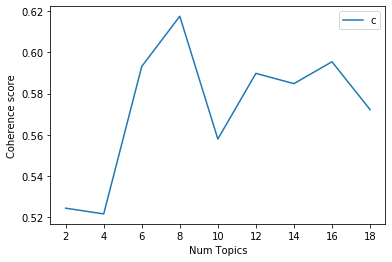

In [39]:
# Show graph
plt.plot(num_topics_list, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [40]:
# Can take a long time to run.
num_topics_list, coherence_values = compute_coherence_values2(dictionary=dictionary, corpus=corpus, texts=texts, start=2, limit=20, step=2)

num_topics=2, coherence=0.5897126799542405
num_topics=4, coherence=0.5508730592310299
num_topics=6, coherence=0.596398897266277
num_topics=8, coherence=0.5444843069206828
num_topics=10, coherence=0.542017188984096
num_topics=12, coherence=0.548068197272595
num_topics=14, coherence=0.5456145959632753
num_topics=16, coherence=0.4943758512112838
num_topics=18, coherence=0.5457815645279404


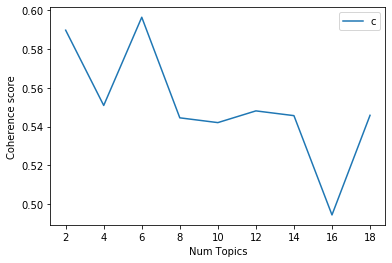

In [41]:
# Show graph
plt.plot(num_topics_list, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [42]:
# обучение модель
np.random.seed(76543)
%time ldamodel2 = models.ldamodel.LdaModel(corpus2, id2word=dictionary2, num_topics=8, passes=20, alpha=1.25, eta=1.25)

Wall time: 4min 29s


In [43]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel2, corpus2, dictionary2)
vis

C:\Users\sych_\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.178869  0.242909       1        1  16.478258
2      0.135418 -0.015722       2        1  13.949631
7      0.008194  0.017962       3        1  13.601690
3     -0.022921  0.155738       4        1  12.786386
4      0.096223 -0.083467       5        1  12.494384
6      0.102351  0.003897       6        1  12.162345
1      0.139396 -0.079366       7        1  11.227248
5     -0.279792 -0.241952       8        1   7.300056, topic_info=     Category         Freq          Term        Total  loglift  logprob
3445  Default  4183.000000          this  4183.000000  30.0000  30.0000
256   Default  3558.000000        задача  3558.000000  29.0000  29.0000
1525  Default  3108.000000       принять  3108.000000  28.0000  28.0000
553   Default  2477.000000             a  2477.000000  27.0000  27.0000
2003  Default  2404.000000      whatsapp  2404.000000  26.0000  26.0000
1494  Default  2306.000000        system  2306.000000  25.0000  25.0000
1491  Default  2304.000000       message  2304.000000  24.0000  24.0000
923   Default  3352.000000        пароль  3352.000000  23.0000  23.0000
3446  Default  2209.000000            to  2209.000000  22.0000  22.0000
212   Default  3264.000000     удалённый  3264.000000  21.0000  21.0000
48    Default  2147.000000            is  2147.000000  20.0000  20.0000
2297  Default  2132.000000        client  2132.000000  19.0000  19.0000
1920  Default  2100.000000         start  2100.000000  18.0000  18.0000
3870  Default  2097.000000          with  2097.000000  17.0000  17.0000
3869  Default  2096.000000         which  2096.000000  16.0000  16.0000
3867  Default  2096.000000        allows  2096.000000  15.0000  15.0000
3868  Default  2096.000000          chat  2096.000000  14.0000  14.0000
696   Default  2964.000000  подключиться  2964.000000  13.0000  13.0000
81    Default  2539.000000     программа  2539.000000  12.0000  12.0000
524   Default  2863.000000       сегодня  2863.000000  11.0000  11.0000
25    Default  3730.000000      документ  3730.000000  10.0000  10.0000
125   Default  2453.000000          цена  2453.000000   9.0000   9.0000
210   Default  2688.000000       рабочий  2688.000000   8.0000   8.0000
262   Default  2562.000000     компьютер  2562.000000   7.0000   7.0000
867   Default  2243.000000           код  2243.000000   6.0000   6.0000
14    Default  2457.000000         номер  2457.000000   5.0000   5.0000
77    Default  3236.000000        доступ  3236.000000   4.0000   4.0000
1344  Default  1867.000000            рц  1867.000000   3.0000   3.0000
485   Default  1808.000000           ооо  1808.000000   2.0000   2.0000
2599  Default  1659.000000            пз  1659.000000   1.0000   1.0000
...       ...          ...           ...          ...      ...      ...
48     Topic8  2139.092773            is  2147.324707   2.6134  -3.1275
2297   Topic8  2124.194336        client  2132.427734   2.6134  -3.1344
1920   Topic8  2092.249512         start  2100.428711   2.6134  -3.1496
3870   Topic8  2089.169189          with  2097.336670   2.6134  -3.1511
3867   Topic8  2088.225098        allows  2096.391846   2.6134  -3.1515
3868   Topic8  2088.225098          chat  2096.391846   2.6134  -3.1515
3869   Topic8  2088.225098         which  2096.391846   2.6134  -3.1515
442    Topic8   577.471802                 586.696472   2.6014  -4.4369
112    Topic8   610.800781          тест   622.779968   2.5979  -4.3808
4183   Topic8   363.365906           pdf   376.368652   2.5821  -4.9002
575    Topic8   319.727356          mail   331.738495   2.5804  -5.0281
569    Topic8   157.077789          font   165.152374   2.5672  -5.7388
1489   Topic8   257.374451         error   270.624542   2.5671  -5.2451
1492   Topic8   208.687500       occured   220.626022   2.5617  -5.4547
1493   Topic8   202.491837      received   214.319778   2.5605  -5.4849
1893   Topic8   190.411697       

In [168]:
# выводим топы слов
for t, top_words in ldamodel2.print_topics(num_topics=20, num_words=10):
    print("Topic", t, ":", top_words)

Topic 0 : 0.073*"пароль" + 0.070*"удалённый" + 0.064*"подключиться" + 0.055*"рабочий" + 0.043*"стол" + 0.033*"сервер" + 0.033*"войти" + 0.029*"подключение" + 0.024*"доступ" + 0.016*"заходить"
Topic 1 : 0.092*"дать" + 0.073*"работа" + 0.049*"отправить" + 0.040*"сервис" + 0.028*"ответ" + 0.025*"связь" + 0.024*"имя" + 0.023*"свой" + 0.022*"давать" + 0.021*"обращение"
Topic 2 : 0.065*"программа" + 0.061*"почта" + 0.033*"очень" + 0.032*"ерп" + 0.032*"висеть" + 0.032*"заработать" + 0.031*"минута" + 0.024*"посмотреть" + 0.023*"открываться" + 0.023*"долго"
Topic 3 : 0.073*"принять" + 0.046*"всд" + 0.029*"приёмка" + 0.028*"приход" + 0.027*"поставить" + 0.025*"пн" + 0.021*"невад" + 0.017*"шк" + 0.014*"принимать" + 0.014*"доверительный"
Topic 4 : 0.047*"позиция" + 0.036*"выгрузить" + 0.036*"рц" + 0.032*"выгрузиться" + 0.026*"выгружаться" + 0.026*"статус" + 0.024*"автозаказ" + 0.017*"прогрузить" + 0.017*"активный" + 0.016*"edi"
Topic 5 : 0.099*"this" + 0.058*"a" + 0.057*"whatsapp" + 0.055*"system"

In [107]:
coherence = ldamodel.top_topics(corpus)
coherence

[([(0.047347333, 'не'),
   (0.02694247, 'я'),
   (0.024990896, 'что'),
   (0.02461555, 'и'),
   (0.023013793, 'в'),
   (0.019980693, 'на'),
   (0.019357448, 'это'),
   (0.018206524, 'по'),
   (0.01758824, 'вы'),
   (0.016624687, 'мочь'),
   (0.016228473, 'быть'),
   (0.016223265, '—'),
   (0.015534062, 'у'),
   (0.014062797, 'а'),
   (0.012926415, 'мы'),
   (0.012734087, 'как'),
   (0.012427677, 'с'),
   (0.010317125, 'весь'),
   (0.009244823, 'так'),
   (0.009082981, 'он')],
  -1.1865967337230166),
 ([(0.046152614, 'не'),
   (0.042728916, 'я'),
   (0.03282336, 'мочь'),
   (0.025446698, 'на'),
   (0.023545932, 'зайти'),
   (0.022491483, 'к'),
   (0.018465722, 'пароль'),
   (0.01836388, 'и'),
   (0.01794271, 'удалённый'),
   (0.016290106, 'подключиться'),
   (0.014687329, 'рабочий'),
   (0.014663689, 'доступ'),
   (0.013538131, 'в'),
   (0.01318091, 'компьютер'),
   (0.010905454, 'стол'),
   (0.0101873465, 'удалёнка'),
   (0.009863267, 'через'),
   (0.009226356, 'с'),
   (0.0084298365, 

In [108]:
coherence_mean = 0
for i in range(len(coherence)):
    coherence_mean += coherence[i][1]
coherence_mean = coherence_mean / len(coherence)
coherence_mean

-5.210383326233794

In [155]:
coherence2 = ldamodel2.top_topics(corpus2)
coherence2

[([(0.07253607, 'пароль'),
   (0.07038867, 'удалённый'),
   (0.06384665, 'подключиться'),
   (0.054973297, 'рабочий'),
   (0.042983096, 'стол'),
   (0.03318298, 'сервер'),
   (0.03275416, 'войти'),
   (0.029222988, 'подключение'),
   (0.024096884, 'доступ'),
   (0.016056413, 'заходить'),
   (0.015035854, 'вход'),
   (0.014550491, 'вводить'),
   (0.014188201, 'dev'),
   (0.012712072, 'логин'),
   (0.011435014, 'приложение'),
   (0.009149564, 'ярлык'),
   (0.008990897, 'co'),
   (0.008850915, 'подключаться'),
   (0.008543593, 'свой'),
   (0.008466518, 'rn')],
  -2.5250892676912273),
 ([(0.049780637, 'ооо'),
   (0.034958784, 'договор'),
   (0.022219332, 'год'),
   (0.020588122, 'приходить'),
   (0.018832933, 'клиент'),
   (0.015768671, 'ип'),
   (0.014415232, 'заполнить'),
   (0.013110445, 'агент'),
   (0.011561348, 'тт'),
   (0.011152051, 'инна'),
   (0.010926695, 'сэд'),
   (0.010848173, 'контрагент'),
   (0.010367473, 'аналитик'),
   (0.009945166, 'марс'),
   (0.009565764, 'владивосток

In [156]:
coherence_mean2 = 0
for i in range(len(coherence2)):
    coherence_mean2 += coherence2[i][1]
coherence_mean2 = coherence_mean2 / len(coherence2)
coherence_mean2

-3.7634616807016186

In [74]:
len(coherence2)

50

In [157]:
ldamodel2.get_document_topics(corpus2)[0]

[(0, 0.032426253),
 (1, 0.03504245),
 (2, 0.06408015),
 (3, 0.039828934),
 (4, 0.06183358),
 (5, 0.034293287),
 (6, 0.08317568),
 (7, 0.034831032),
 (8, 0.03526868),
 (9, 0.037035994),
 (10, 0.034909196),
 (11, 0.033965506),
 (12, 0.038410205),
 (13, 0.034298692),
 (14, 0.03492129),
 (15, 0.14768904),
 (16, 0.060532525),
 (17, 0.03397078),
 (18, 0.034591157),
 (19, 0.08889555)]

In [112]:
ldamodel2.alpha

array([1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25,
       1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25],
      dtype=float32)

In [113]:
# обучение модель
np.random.seed(76543)
%time ldamodel3 = models.ldamodel.LdaModel(corpus2, id2word=dictionary2, num_topics=20, passes=5, alpha=1, eta=1.25)

Wall time: 1min 27s


In [114]:
ldamodel3.get_document_topics(corpus2)[0]

[(0, 0.027991934),
 (1, 0.024420936),
 (2, 0.0925762),
 (3, 0.045938678),
 (4, 0.024754565),
 (5, 0.026255725),
 (6, 0.044113357),
 (7, 0.03808709),
 (8, 0.065007225),
 (9, 0.026180468),
 (10, 0.02684316),
 (11, 0.15491146),
 (12, 0.06763508),
 (13, 0.025940143),
 (14, 0.18819183),
 (15, 0.026292514),
 (16, 0.025246033),
 (17, 0.021741312),
 (18, 0.020259874),
 (19, 0.027612459)]

In [222]:
!pip install pyLDAvis

  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97715 sha256=a4834f767cfe6b16629ef2473c7c1241e5b5f91ab651c67ff0901195a04d1010
  Stored in directory: C:\Users\sych_\AppData\Local\pip\Cache\wheels\98\71\24\513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32045 sha256=75219d64bf4fbf72d4ecc47802cf2af4f0eb2f4630ebfc43e5d3d6116483a709
  Stored in directory: C:\Users\sych_\AppData\Local\pip\Cache\wheels\20\5a\d8\1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [226]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel2, corpus2, dictionary2)
vis

C:\Users\sych_\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
0      0.287608  0.128736       1        1  6.555348
6     -0.018500  0.156701       2        1  5.764034
7      0.029529 -0.009907       3        1  5.713881
4     -0.148662  0.066852       4        1  5.522835
9     -0.054373 -0.045788       5        1  5.365873
3     -0.103900  0.040898       6        1  5.286002
17    -0.088790  0.039522       7        1  5.068855
1      0.021882 -0.046728       8        1  5.064364
14    -0.080903  0.022683       9        1  5.042070
15     0.003957  0.058174      10        1  5.032742
12    -0.120447  0.062286      11        1  4.946340
2      0.113026 -0.022840      12        1  4.926134
11     0.000653 -0.027563      13        1  4.920000
16     0.164486  0.025636      14        1  4.803297
18     0.073245 -0.023136      15        1  4.608011
8     -0.025009 -0.021018      16        1  4.559428
10    -0.024401 -0.032208      17        1  4.508893
13    -0.041327 -0.046521      18        1  4.220263
19    -0.033228 -0.038988      19        1  4.088366
5      0.045154 -0.286789      20        1  4.003265, topic_info=     Category         Freq          Term        Total  loglift  logprob
25    Default  3520.000000      документ  3520.000000  30.0000  30.0000
216   Default  3187.000000          дать  3187.000000  29.0000  29.0000
256   Default  2870.000000        задача  2870.000000  28.0000  28.0000
698   Default  2904.000000    получиться  2904.000000  27.0000  27.0000
3445  Default  2676.000000          this  2676.000000  26.0000  26.0000
126   Default  2794.000000       большой  2794.000000  25.0000  25.0000
923   Default  3235.000000        пароль  3235.000000  24.0000  24.0000
212   Default  3144.000000     удалённый  3144.000000  23.0000  23.0000
14    Default  2591.000000         номер  2591.000000  22.0000  22.0000
257   Default  2657.000000     закрывать  2657.000000  21.0000  21.0000
1525  Default  2596.000000       принять  2596.000000  20.0000  20.0000
696   Default  2856.000000  подключиться  2856.000000  19.0000  19.0000
125   Default  2448.000000          цена  2448.000000  18.0000  18.0000
262   Default  2453.000000     компьютер  2453.000000  17.0000  17.0000
209   Default  2549.000000        работа  2549.000000  16.0000  16.0000
77    Default  3211.000000        доступ  3211.000000  15.0000  15.0000
834   Default  2562.000000      самбрать  2562.000000  14.0000  14.0000
133   Default  2260.000000         ждать  2260.000000  13.0000  13.0000
867   Default  2237.000000           код  2237.000000  12.0000  12.0000
297   Default  2163.000000      провести  2163.000000  11.0000  11.0000
2     Default  2413.000000        делать  2413.000000  10.0000  10.0000
81    Default  2192.000000     программа  2192.000000   9.0000   9.0000
28    Default  2075.000000     проверить  2075.000000   8.0000   8.0000
210   Default  2588.000000       рабочий  2588.000000   7.0000   7.0000
220   Default  2039.000000      выдавать  2039.000000   6.0000   6.0000
332   Default  1981.000000    подсказать  1981.000000   5.0000   5.0000
615   Default  2215.000000         почта  2215.000000   4.0000   4.0000
2599  Default  1773.000000            пз  1773.000000   3.0000   3.0000
163   Default  2743.000000         нужно  2743.000000   2.0000   2.0000
397   Default  2070.000000       магазин  2070.000000   1.0000   1.0000
...       ...          ...           ...          ...      ...      ...
1494  Topic20  1461.268555        system  1482.381592   3.2037  -2.9078
1491  Topic20  1460.548340       message  1481.652954   3.2037  -2.9083
48    Topic20  1360.369141            is  1381.421265   3.2027  -2.9793
3446  Topic20  1398.930420            to  1420.707520   3.2026  -2.9514
2297  Topic20  1350.913696        client  1371.946045   3.2026  -2.9863
3870  Topic20  1328.727051          with  1349.607056   3.2025  -3.0029
1920  Topic20  1330.664185         start  1351.577271  

In [243]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    #for num_topics in range(start, limit, step):
    model = models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
    model_list.append(model)
    coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=dictionary2, corpus=corpus2, texts=texts, start=2, limit=20, step=2)

In [ ]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

In [232]:
def format_topics_sentences(ldamodel=ldamodel2, corpus=corpus2, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [233]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel2, corpus=corpus2, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,15.0,0.1477,"делать, доступ, данный, нужный, время, смочь, ...","[сломаться, ноготь, сломать, ноготь, сломать, ..."
1,1,2.0,0.1911,"программа, почта, очень, ерп, висеть, заработа...","[сок, протечь, сломать, ноутбук, ерп, висеть, ..."
2,2,2.0,0.1484,"программа, почта, очень, ерп, висеть, заработа...","[работать, ерп, работать, ерп, ерп, упасть, на..."
3,3,2.0,0.2253,"программа, почта, очень, ерп, висеть, заработа...","[ерп, ерп, ерп, чинить, сволочь, зависнуть, ер..."
4,4,2.0,0.2937,"программа, почта, очень, ерп, висеть, заработа...","[висеть, ерп, висеть, ерп, весить, erp, висеть..."
5,5,2.0,0.2937,"программа, почта, очень, ерп, висеть, заработа...","[висеть, ерп, висеть, ерп, весить, erp, висеть..."
6,6,14.0,0.1698,"документ, провести, нужно, перемещение, удалит...","[загружаться, заказ, висеть, ерп, проверить, в..."
7,7,14.0,0.1698,"документ, провести, нужно, перемещение, удалит...","[загружаться, заказ, висеть, ерп, проверить, в..."
8,8,14.0,0.1698,"документ, провести, нужно, перемещение, удалит...","[загружаться, заказ, висеть, ерп, проверить, в..."
9,9,2.0,0.0810,"программа, почта, очень, ерп, висеть, заработа...","[заказ, загружаться, заказ, загружаться, заказ..."


In [236]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics.head()

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0,15.0,"делать, доступ, данный, нужный, время, смочь, ...",4073.0,0.1139
1,2.0,"программа, почта, очень, ерп, висеть, заработа...",1016.0,0.0284
2,2.0,"программа, почта, очень, ерп, висеть, заработа...",2937.0,0.0821
3,2.0,"программа, почта, очень, ерп, висеть, заработа...",2054.0,0.0574
4,2.0,"программа, почта, очень, ерп, висеть, заработа...",2292.0,0.0641


In [235]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.8654,"пароль, удалённый, подключиться, рабочий, стол...","[недоступный, база, вещевой, довольствие, srv,..."
1,1.0,0.6635,"дать, работа, отправить, сервис, ответ, связь,...","[весь, работать, стараться, улучшить, качество..."
2,2.0,0.4544,"программа, почта, очень, ерп, висеть, заработа...","[очень, сильно, висеть, смк, едис, латыпов, юл..."
3,3.0,0.6723,"принять, всд, приёмка, приход, поставить, пн, ...","[ален, перепелица, поставщик, принять, мочь, п..."
4,4.0,0.5964,"позиция, выгрузить, рц, выгрузиться, выгружать...","[😳😳😳, смотреть, весь, активно, блин, огромный,..."
